In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans 
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
import warnings
warnings.simplefilter('ignore')

In [2]:
initial_trian=pd.read_csv('Data science algorithms.csv')

In [3]:
X_train=initial_trian.iloc[:,1:].values
Y_train = initial_trian.iloc[:,0].values
X_train=np.mod((np.abs(-1*(X_train<49)))+1,2)

In [4]:
def plot_d(digit, label):
    plt.axis('off')
    plt.imshow(digit.reshape((28,28)), cmap=plt.cm.gray)
    plt.title(label)

def plot_ds(digits, title, labels):
    n=digits.shape[0]
    n_rows=n/25+1
    n_cols=25
    plt.figure(figsize=(n_cols * 1, n_rows * 1.5))
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.suptitle(title)
    for i in range(n):
        plt.subplot(n_rows, n_cols, i + 1)
        plot_d(digits[i,:], "%d" % labels[i])
        
def plot_clusters(predict, y, stats):
    for i in range(10):
        indices = np.where(predict == i)
        title = "Most freq item %d, cluster size %d, majority %d " % (stats[i,2], stats[i,1], stats[i,0])
        plot_ds(X_train[indices][:25], title, y[indices])
        
def clusters_stats(predict, y):
    stats = np.zeros((10,3))
    for i in range(10):
        indices = np.where(predict == i)
        cluster = y[indices]
        stats[i,:] = clust_stats(cluster)
    return stats


def imshowing(A,n):
    plt.imshow(A[n,:].reshape((28,28)),cmap='gray')
    print(i)

def clust_stats(cluster):
    class_freq = np.zeros(10)
    for i in range(10):
        class_freq[i] = np.count_nonzero(cluster == i)
    most_freq = np.argmax(class_freq)
    n_majority = np.max(class_freq)
    n_all = np.sum(class_freq)
    return (n_majority, n_all, most_freq)
    
def clusters_purity(clusters_stats):
    majority_sum  = clusters_stats[:,0].sum()
    n = clusters_stats[:,1].sum()
    return majority_sum / n


n=100000
n_digits=10
X = X_train[0:n, :]
Y = Y_train[0:n]
inputs = X[:n,:]

Plotting an extract of the 10 clusters, overall purity: 0.624050


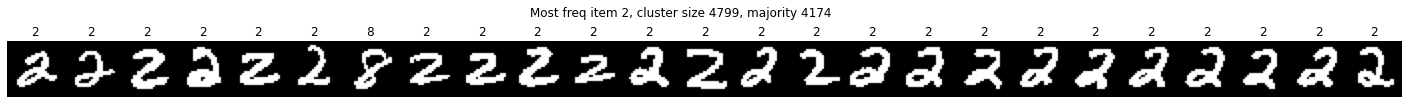

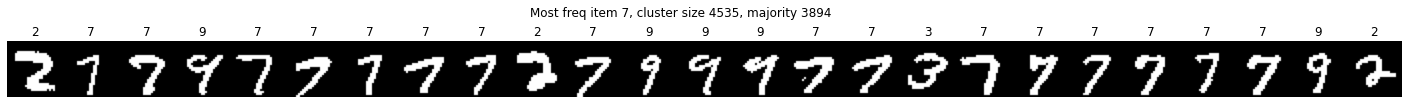

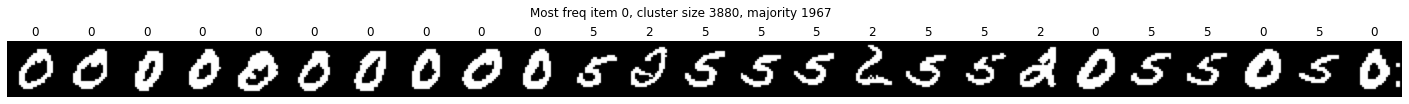

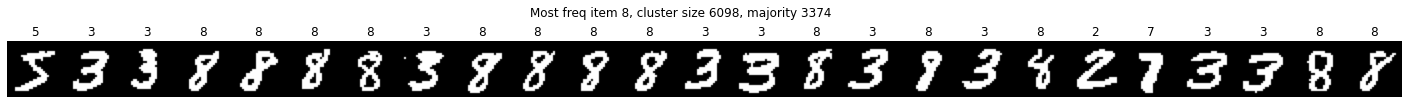

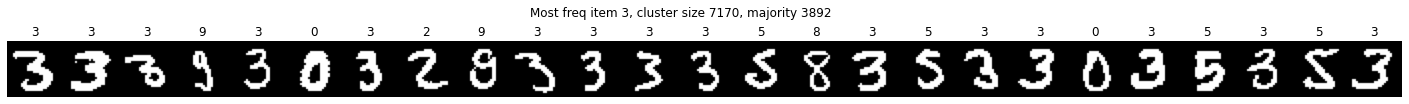

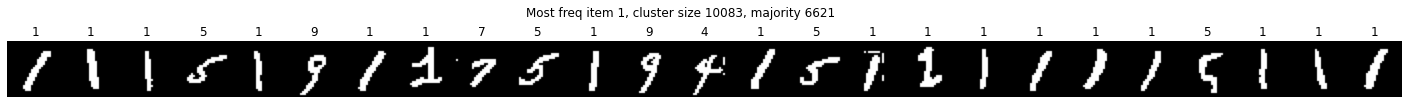

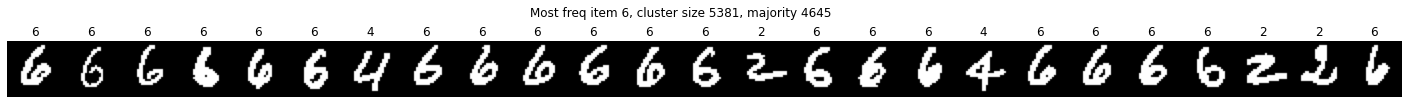

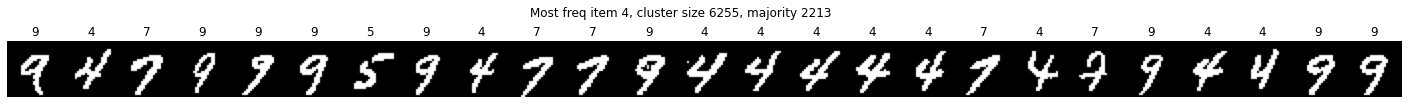

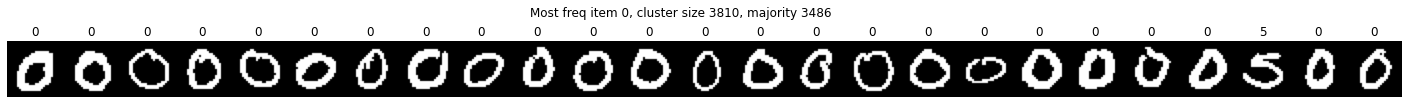

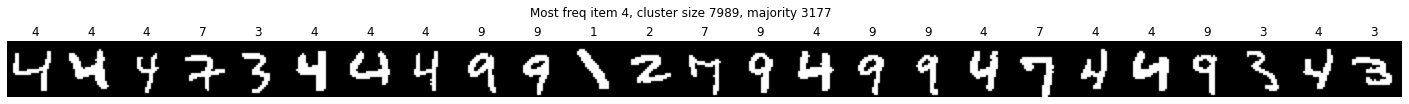

In [5]:
a=0
while(a<0.61):
    pca = PCA(n_components=n_digits)
    kmeans = KMeans(n_clusters=n_digits,n_init=1)
    predictor = Pipeline([('pca', pca), ('kmeans', kmeans)])

    predict = predictor.fit(inputs).predict(inputs)

    stats = clusters_stats(predict, Y)
    purity = clusters_purity(stats)
    a=purity

print("Plotting an extract of the 10 clusters, overall purity: %f" % purity)

plot_clusters(predict, Y, stats)